In [48]:
from bs4 import BeautifulSoup
import pymongo
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# IMBD Web Scrape
movie_titles = []

In [4]:
# web scrape code here 
starts = ['1', '51', '101', '151', '201', '251', '301', '351', '401', '451', '501', '551', '601', '651', '701', '751', '801', '851', '901', '951']

for start in starts:
    imdb_url = f'https://www.imdb.com/search/title/?title_type=feature&release_date=2010-01-01,2019-12-31&view=simple&sort=num_votes,desc&start={start}&ref_=adv_nxt'
    imdb_response = requests.get(imdb_url)
    soup = BeautifulSoup(imdb_response.text, 'html')
    results = soup.find_all('div', class_='col-title')
    
    for result in results:
        title = result.find('a').text
        movie_titles.append(title)
    
movie_titles

['Inception',
 'The Dark Knight Rises',
 'Interstellar',
 'Django Unchained',
 'The Avengers',
 'The Wolf of Wall Street',
 'Shutter Island',
 'Guardians of the Galaxy',
 'Deadpool',
 'Mad Max: Fury Road',
 'Star Wars: Episode VII - The Force Awakens',
 'The Hunger Games',
 'Gone Girl',
 'Joker',
 'Avengers: Infinity War',
 'Gravity',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Iron Man Three',
 'Toy Story 3',
 'The Martian',
 'The Intouchables',
 'Thor',
 'Avengers: Endgame',
 'Captain America: The First Avenger',
 'Avengers: Age of Ultron',
 'Captain America: The Winter Soldier',
 'Iron Man 2',
 'Black Swan',
 'The Grand Budapest Hotel',
 'Whiplash',
 'The Revenant',
 'Man of Steel',
 'The Imitation Game',
 'X-Men: Days of Future Past',
 'Silver Linings Playbook',
 'How to Train Your Dragon',
 'Captain America: Civil War',
 'X: First Class',
 "The King's Speech",
 'Skyfall',
 'Logan',
 '12 Years a Slave',
 'Batman v Superman: Dawn of Justi

In [5]:
# OMDB requests
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=trilogy"

In [6]:
# for loop to access movie titles, and reques OMDB information to dump into JSON output

output = [] # list for our json objects from OMDB

for movie in movie_titles: 
    response = requests.get(url + movie + api_key)
    data = response.json()
    output.append(data)
    
with open('data.json', 'w') as outfile:
    json.dump(output, outfile)
        
pprint(data) #will print only the last movie called - shows that for loop works

{'Actors': 'Johnny Depp, Gwyneth Paltrow, Paul Bettany, Ewan McGregor',
 'Awards': '1 win & 8 nominations.',
 'BoxOffice': '$6,847,536',
 'Country': 'UK, USA',
 'DVD': '12 May 2015',
 'Director': 'David Koepp',
 'Genre': 'Action, Adventure, Comedy, Crime, Mystery, Romance',
 'Language': 'English',
 'Metascore': '27',
 'Plot': 'Juggling angry Russians, the British Mi5, and an international '
         'terrorist, debonair art dealer and part-time rogue Charlie Mortdecai '
         'races to recover a stolen painting rumored to contain a code that '
         'leads to lost gold.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjM3NDcxOTM5Ml5BMl5BanBnXkFtZTgwNTEwNzE0MzE@._V1_SX300.jpg',
 'Production': 'Liongate Films',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.5/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '12%'},
             {'Source': 'Metacritic', 'Value': '27/100'}],
 'Released': '23 Jan 2015',
 'Response': 'True',
 'Runtime': '10

In [50]:
metascores = []

index = 0

while index < len(movie_titles):
    for metascore in output[index]:
        try:
            metascore = output[index]['Metascore']
            metascores.append(metascore)
            index = index + 1
        except KeyError:
            metascores.append("NA")
            index = index + 1
            

len(metascores)

1000

In [8]:
metascore_ints = []

for metascore in metascores:
    try:
        metascore_int = int(metascore)
        metascore_ints.append(metascore_int)
    except ValueError:
        print("Value Error")
    
# metascore_ints

Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error
Value Error


In [9]:
max_score = max(metascore_ints)
min_score = min(metascore_ints)

print(f'Max Score is: {max_score}')
print(f'Min Score is: {min_score}')

Max Score is: 100
Min Score is: 18


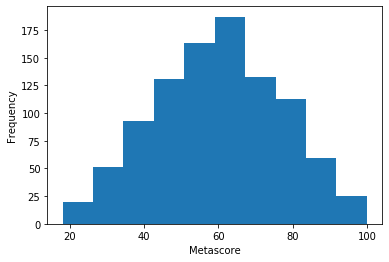

In [10]:
plt.hist(metascore_ints, bins = 10)
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.show()

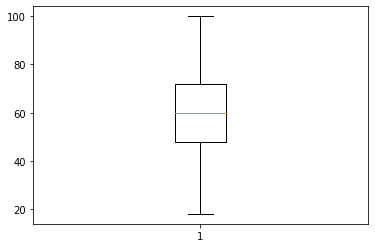

In [11]:
plt.boxplot(metascore_ints)
plt.show()

In [38]:
directors = []

index = 0

while index < len(movie_titles):
    for director in output[index]:
        try:
            director = output[index]['Director']
            directors.append(director)
            index = index + 1
        except KeyError:
            directors.append("NA")
            index = index + 1 

print(directors)

['Christopher Nolan', 'Christopher Nolan', 'Christopher Nolan', 'Quentin Tarantino', 'Joss Whedon', 'Martin Scorsese', 'Martin Scorsese', 'James Gunn', 'Tim Miller', 'George Miller', 'J.J. Abrams', 'Gary Ross', 'David Fincher', 'Todd Phillips', 'Anthony Russo, Joe Russo', 'Alfonso Cuarón', 'Peter Jackson', 'David Yates', 'NA', 'Lee Unkrich', 'Ridley Scott', 'Olivier Nakache, Éric Toledano', 'Kenneth Branagh', 'Anthony Russo, Joe Russo', 'Joe Johnston', 'Joss Whedon', 'Anthony Russo, Joe Russo', 'Jon Favreau', 'Darren Aronofsky', 'Wes Anderson', 'Damien Chazelle', 'Alejandro G. Iñárritu', 'Zack Snyder', 'Morten Tyldum', 'Bryan Singer', 'David O. Russell', 'Dean DeBlois, Chris Sanders', 'Anthony Russo, Joe Russo', 'NA', 'Tom Hooper', 'Sam Mendes', 'James Mangold', 'Steve McQueen', 'Zack Snyder', 'David Fincher', 'Francis Lawrence', 'Peter Jackson', 'Marc Forster', 'Pete Docter, Ronnie Del Carmen(co-director)', 'Ryan Coogler', 'Louis Leterrier', 'David Ayer', 'Doug Liman', 'Alan Taylor', 

In [37]:
actors = []

index = 0

while index < len(movie_titles):
    for actor in output[index]:
        try:
            actor = output[index]['Actors']
            actors.append(actor)
            index = index + 1
        except KeyError:
            actors.append("NA")
            index = index + 1
            

print(actors)

['Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Tom Hardy', 'Christian Bale, Gary Oldman, Tom Hardy, Joseph Gordon-Levitt', 'Ellen Burstyn, Matthew McConaughey, Mackenzie Foy, John Lithgow', 'Jamie Foxx, Christoph Waltz, Leonardo DiCaprio, Kerry Washington', 'Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth', 'Leonardo DiCaprio, Jonah Hill, Margot Robbie, Matthew McConaughey', 'Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley, Max von Sydow', 'Chris Pratt, Zoe Saldana, Dave Bautista, Vin Diesel', 'Ryan Reynolds, Karan Soni, Ed Skrein, Michael Benyaer', 'Tom Hardy, Charlize Theron, Nicholas Hoult, Hugh Keays-Byrne', 'Harrison Ford, Mark Hamill, Carrie Fisher, Adam Driver', 'Stanley Tucci, Wes Bentley, Jennifer Lawrence, Willow Shields', 'Ben Affleck, Rosamund Pike, Neil Patrick Harris, Tyler Perry', 'Joaquin Phoenix, Robert De Niro, Zazie Beetz, Frances Conroy', 'Robert Downey Jr., Chris Hemsworth, Mark Ruffalo, Chris Evans', 'Sandra Bullock, George Clooney, Ed Harris, 

In [36]:
years = []

index = 0

while index < len(movie_titles):
    for year in output[index]:
        try:
            year = output[index]['Year']
            years.append(year)
            index = index + 1
        except KeyError:
            years.append("NA")
            index = index + 1
            

print(years)

['2010', '2012', '2014', '2012', '2012', '2013', '2010', '2014', '2016', '2015', '2015', '2012', '2014', '2019', '2018', '2013', '2012', '2011', 'NA', '2010', '2015', '2011', '2011', '2019', '2011', '2015', '2014', '2010', '2010', '2014', '2014', '2015', '2013', '2014', '2014', '2012', '2010', '2016', 'NA', '2010', '2012', '2017', '2013', '2016', '2010', '2013', '2013', '2013', '2015', '2018', '2013', '2016', '2014', '2013', '2014', '2013', '2016', '2012', '2016', '2015', '2012', '2012', '2014', '2012', '2013', '2011', '2017', '2012', '2015', '2017', '2017', '2016', '2017', '2012', '2017', '2010', '2011', '2013', '2014', '2012', '2015', '2011', '2010', '2017', '2016', '2013', '2011', '2011', '2019', '2013', '2014', '2017', '2011', '2013', '2013', '2010', '2014', '2011', '2018', '2011', '2012', '2014', '2013', '2017', '2017', '2014', '2013', '2013', '2014', '2018', '2011', '2013', '2013', '2014', '2016', '2011', '2011', '2019', '2013', '2017', '2011', '2014', '2016', '2013', '2011', '20

In [35]:
boxOffices = []

index = 0

while index < len(movie_titles):
    for boxOffice in output[index]:
        try:
            boxOffice = output[index]['BoxOffice']
            boxOffices.append(boxOffice)
            index = index + 1
        except KeyError:
            boxOffices.append("NA")
            index = index + 1
            

print(boxOffices)

['$292,568,851', '$448,130,642', '$158,737,441', '$162,804,648', '$623,279,547', '$91,330,760', '$125,001,000', '$270,592,504', '$328,674,489', '$129,483,877', '$936,658,640', '$407,981,652', 'N/A', 'N/A', '$664,987,816', '$274,084,951', '$303,001,229', '$381,000,185', 'NA', '$414,984,497', '$202,313,768', '$13,179,837', '$181,015,141', 'N/A', 'N/A', '$429,113,729', '$228,636,083', '$312,057,433', '$106,952,327', '$56,939,515', 'N/A', 'N/A', '$291,021,565', 'N/A', '$199,305,306', '$132,088,910', '$216,900,000', '$408,080,554', 'NA', '$138,300,000', '$299,300,000', 'N/A', '$50,628,650', 'N/A', '$96,400,000', '$336,663,349', '$180,443,783', '$202,351,611', '$264,317,903', 'N/A', '$117,698,894', '$325,021,779', '$77,121,429', '$206,360,018', '$119,469,511', '$60,962,878', 'N/A', '$103,500,000', '$100,501,349', '$528,757,749', '$136,019,448', '$218,100,000', 'N/A', '$126,464,904', '$400,736,600', '$34,300,000', 'N/A', '$262,030,663', '$138,002,223', 'N/A', '$619,117,636', 'N/A', 'N/A', '$6

In [34]:
ratings = []

index = 0

while index < len(movie_titles):
    for rating in output[index]:
        try:
            rating = output[index]['Rated']
            ratings.append(rating)
            index = index + 1
        except KeyError:
            ratings.append("NA")
            index = index + 1
            

print(ratings)

['PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'NA', 'G', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG', 'PG-13', 'NA', 'R', 'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'PG-13', 'PG', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', 'PG', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'PG-13', 'PG', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'R', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG', 'R', 'PG-13', 'PG-13', 'R', 'R', 'PG-13', 'R', 'R', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG-13', 'R', 'R', 'PG', 'PG-13', 'PG', 'R', 'PG-13', 'PG

In [39]:
imdbRatings = []

index = 0

while index < len(movie_titles):
    for imdbRating in output[index]:
        try:
            imdbRating = output[index]['imdbRating']
            imdbRatings.append(imdbRating)
            index = index + 1
        except KeyError:
            imdbRatings.append("NA")
            index = index + 1
            

print(imdbRatings)

['8.8', '8.4', '8.6', '8.4', '8.0', '8.2', '8.1', '8.0', '8.0', '8.1', '7.9', '7.2', '8.1', '8.5', '8.5', '7.7', '7.8', '8.1', 'NA', '8.3', '8.0', '8.5', '7.0', '8.4', '6.9', '7.3', '7.7', '7.0', '8.0', '8.1', '8.5', '8.0', '7.0', '8.0', '8.0', '7.7', '8.1', '7.8', 'NA', '8.0', '7.7', '8.1', '8.1', '6.5', '7.7', '7.5', '7.8', '7.0', '8.2', '7.3', '7.3', '6.0', '7.9', '6.9', '7.7', '8.1', '7.5', '7.9', '7.9', '7.0', '7.7', '6.9', '7.7', '7.0', '7.5', '7.8', '7.9', '6.9', '7.3', '7.6', '7.0', '7.8', '7.4', '7.4', '7.9', '7.6', '7.4', '8.0', '7.4', '7.2', '7.8', '7.6', '7.6', '7.4', '8.0', '7.0', '7.5', '6.6', '7.7', '7.2', '7.4', '7.7', '7.4', '6.9', '7.7', '7.7', '7.7', '6.4', '7.7', '7.4', '8.0', '7.9', '7.2', '7.3', '8.0', '6.4', '7.5', '8.0', '7.3', '8.0', '8.2', '6.7', '8.1', '6.7', '8.0', '6.9', '8.1', '6.9', '6.6', '7.6', '7.5', '7.6', '8.1', '7.8', '7.8', '6.6', '6.8', '7.6', '8.6', '7.3', '6.6', '8.2', '8.1', '7.8', '7.3', '7.7', '7.0', '7.7', '7.5', '6.9', '6.2', '6.6', '7.7', 

In [41]:
imdbVotes = []

index = 0

while index < len(movie_titles):
    for imdbVote in output[index]:
        try:
            imdbVote = output[index]['imdbVotes']
            imdbVotes.append(imdbVote)
            index = index + 1
        except KeyError:
            imdbVotes.append("NA")
            index = index + 1
            

print(imdbVotes)

['1,953,512', '1,454,342', '1,395,990', '1,282,957', '1,225,316', '1,107,316', '1,071,216', '1,007,917', '865,426', '836,341', '833,706', '818,687', '810,958', '748,514', '766,327', '746,227', '739,319', '730,224', 'NA', '729,086', '723,614', '715,838', '717,145', '694,527', '711,603', '711,205', '706,555', '693,517', '675,757', '673,301', '670,676', '669,193', '671,513', '653,217', '643,180', '641,736', '641,989', '628,016', 'NA', '620,382', '613,182', '610,395', '608,510', '601,361', '595,251', '594,275', '584,249', '579,584', '577,209', '579,293', '575,712', '574,315', '575,314', '571,192', '569,742', '563,795', '562,696', '560,570', '559,093', '560,612', '556,890', '555,534', '552,429', '554,320', '551,637', '549,955', '542,938', '543,434', '540,523', '537,920', '532,835', '526,836', '525,690', '519,012', '511,831', '513,537', '511,865', '510,311', '505,034', '494,267', '484,384', '485,801', '484,778', '478,341', '472,106', '471,533', '469,329', '465,510', '434,088', '456,854', '45

In [46]:
imdbIDs = []

index = 0

while index < len(movie_titles):
    for imdbID in output[index]:
        try:
            imdbID = output[index]['imdbID']
            imdbIDs.append(imdbID)
            index = index + 1
        except KeyError:
            imdbIDs.append("NA")
            index = index + 1
            

print(imdbIDs)

['tt1375666', 'tt1345836', 'tt0816692', 'tt1853728', 'tt0848228', 'tt0993846', 'tt1130884', 'tt2015381', 'tt1431045', 'tt1392190', 'tt2488496', 'tt1392170', 'tt2267998', 'tt7286456', 'tt4154756', 'tt1454468', 'tt0903624', 'tt1201607', 'NA', 'tt0435761', 'tt3659388', 'tt1675434', 'tt0800369', 'tt4154796', 'tt0458339', 'tt2395427', 'tt1843866', 'tt1228705', 'tt0947798', 'tt2278388', 'tt2582802', 'tt1663202', 'tt0770828', 'tt2084970', 'tt1877832', 'tt1045658', 'tt0892769', 'tt3498820', 'NA', 'tt1504320', 'tt1074638', 'tt3315342', 'tt2024544', 'tt2975590', 'tt1285016', 'tt1951264', 'tt1170358', 'tt0816711', 'tt2096673', 'tt1825683', 'tt1670345', 'tt1386697', 'tt1631867', 'tt1981115', 'tt2802144', 'tt1392214', 'tt1211837', 'tt0454876', 'tt2543164', 'tt0369610', 'tt1024648', 'tt1637725', 'tt2562232', 'tt1446714', 'tt2294629', 'tt0780504', 'tt3501632', 'tt0948470', 'tt0478970', 'tt3896198', 'tt2527336', 'tt3748528', 'tt0451279', 'tt1276104', 'tt5013056', 'tt1250777', 'tt1219289', 'tt1798709',

# Lists
* imdbIDs
* movie_titles
* metascores
* metascore_ints
* directors
* actors
* years
* boxOffices
* ratings
* imdbRatings
* imdbVotes
* imdbIDs

In [80]:
df = pd.DataFrame(
    {'IMDB ID': imdbIDs,
     'Title': movie_titles,
     'Director': directors,
     'Actor': actors,
     'Year': years,
     'Box Office': boxOffices,
     'Rating': ratings,
     'IMDB Rating': imdbRatings,
     'IMDB Votes': imdbVotes,
     'Metascore': metascores
    })

imdb_df

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,"$292,568,851",PG-13,8.8,"1,953,512",74
1,tt1345836,The Dark Knight Rises,Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",2012,"$448,130,642",PG-13,8.4,"1,454,342",78
2,tt0816692,Interstellar,Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",2014,"$158,737,441",PG-13,8.6,"1,395,990",74
3,tt1853728,Django Unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,"$162,804,648",R,8.4,"1,282,957",81
4,tt0848228,The Avengers,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2012,"$623,279,547",PG-13,8.0,"1,225,316",69
...,...,...,...,...,...,...,...,...,...,...
995,tt1591479,Act of Valor,"Mike McCoy, Scott Waugh","Rorke Denver, Dave, Sonny, Weimy",2012,"$65,800,000",R,6.5,"64,922",40
996,tt1473832,Bridget Jones's Baby,Sharon Maguire,"Renée Zellweger, Gemma Jones, Jim Broadbent, S...",2016,"$24,089,465",R,6.5,"64,988",59
997,tt1860242,The Highwaymen,John Lee Hancock,"Kevin Costner, Woody Harrelson, Kathy Bates, J...",2019,N/A,R,6.9,"64,901",58
998,tt1763303,The First Time,Jonathan Kasdan,"Britt Robertson, Dylan O'Brien, Craig Roberts,...",2012,"$17,061",PG-13,6.8,"64,441",55


In [81]:
df['Actor'] = df['Actor'].str.rsplit(',').str[0]
df['Director'] = df['Director'].str.rsplit(',').str[0]

df

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,"$292,568,851",PG-13,8.8,"1,953,512",74
1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,"$448,130,642",PG-13,8.4,"1,454,342",78
2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,"$158,737,441",PG-13,8.6,"1,395,990",74
3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,"$162,804,648",R,8.4,"1,282,957",81
4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,"$623,279,547",PG-13,8.0,"1,225,316",69
...,...,...,...,...,...,...,...,...,...,...
995,tt1591479,Act of Valor,Mike McCoy,Rorke Denver,2012,"$65,800,000",R,6.5,"64,922",40
996,tt1473832,Bridget Jones's Baby,Sharon Maguire,Renée Zellweger,2016,"$24,089,465",R,6.5,"64,988",59
997,tt1860242,The Highwaymen,John Lee Hancock,Kevin Costner,2019,N/A,R,6.9,"64,901",58
998,tt1763303,The First Time,Jonathan Kasdan,Britt Robertson,2012,"$17,061",PG-13,6.8,"64,441",55


In [82]:
df.to_csv('data.csv')